All laboratory assignments and homework will be evaluated based on three key criteria:

1. **Accuracy of Python Code**: Your Python code submissions must be precise and correct.

2. **Clarity and Organization of Jupyter Notebook**: 

- Ensure that your Jupyter notebook is well-structured and neatly organized. 
- Each Python code snippet should be supplemented with appropriate comments using either the "#" symbol or Markdown text.

3. **Effective Presentation of Outputs**: Within your Jupyter notebook, make sure all outputs are clearly visible. If necessary, provide explanations for these outputs using Markdown annotations. However, **avoid displaying entire output blocks; instead, display only the initial two to five rows for clarity**.

Additionally, all submissions must adhere to the following formatting requirements:

- Inclusion of K-State Honor Code: Each laboratory assignment and homework must contain the K-State Honor Code statement: ```"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."```

- Academic Honesty and Consequences: Breach of academic honesty can result in a grade of XF, where "F" indicates failure in the course, and "X" indicates an Honor Pledge violation. Detailed information can be found at this link: http://www.k-state.edu/provost/resources/teaching/course.htm

It's important to note the following prohibitions:

- **Unauthorized Collaboration**: Collaborating with other students on laboratory assignments, homework, the midterm exam, or the final project is strictly prohibited.

- **Unauthorized Aid**: Sharing your code with other students or receiving code from others is considered unauthorized aid and is not allowed.

- **Plagiarism**: Presenting the words of another individual (whether from the Internet or articles) as your own is considered plagiarism and is not permitted.

Adherence to these guidelines will ensure a fair and respectful learning environment and help maintain academic integrity.

**K-State Honor Code**

> On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.



**Your Name:** 

> Bhaskar Aryal

#### Data description
##### Continuous X variables
- satisfaction_level: Level of satisfaction (0-1)
- last_evaluation: Time since last performance evaluation (in Years)
- number_project: Number of projects completed while at work
- average_montly_hours: Average monthly hours at workplace
- time_spend_company: Number of years spent in the company

##### Categorical X variables
- Work_accident: Whether the employee had a workplace accident
- promotion_last_5years: Whether the employee was promoted in the last five years
- sales: Department in which they work for
- salary: Relative level of salary (high)

##### y variable
- left: Whether the employee left the workplace or not (1 or 0)

#### Import packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
import pingouin as pg

import warnings
warnings.filterwarnings("ignore") 

pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})

#### Question 1 
Business Understanding: The question (and step) is that you review the problem statement and the description about the columns (or variables) in the dataset, <ins>and develop three hypotheses1</ins> , which you can test using statistics (e.g., t-testing) and classification analysis on 
the dataset. Provide the rationale for the hypotheses. An example would be “there is no significant difference of satisfaction_level between those staying and those left”. In other words, satisfaction_level has no significant impact on turnover.

#### Load Dataset 

In [2]:
df=pd.read_csv("data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Comments on Dataset Unerstanding:
- The dataset has five continuous numerical variables and four categroical variables. These are independent/predictor variables for the analysis 
- Left: a binary answer (1 or zero) which tells whether the employee left the workplase or not is the response variable

#### <ins>Hypothesis 1</ins>

**Null Hypothesis**: There is no significant difference in satisfaction levels between employees who stayed in the company and those who left.

**Alternative Hypothesis**: There is a significant difference in satisfaction levels between employees who stayed at the company and those who left. 

#### <ins>Hypothesis 2</ins>

**Null Hypothesis**: Salary level does not influence whether employees leave or stay in the company.

**Alternative Hypothesis**: There is a significant difference in salary levels between employees who stayed at the company and those who left. 

#### <ins>Hypothesis 3</ins> 

**Null Hypothesis**: Receiving a promotion in last five years does not influence employee turnover. 

**Alternative Hypothesis**: Promotion within the last five years is a significant factor in an employee turnover.

#### Question 2

(i) Check any missing value. What did you do to handle missing values?

(ii) Any other data quality issues ? 

We will check if there are **missing values** and/or **inconsistent/inaccurate values** to evaluate the data quality 

In [3]:
# Missing values in each column 
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

<ins>Comments</ins>: No missing values observed in any column

In [4]:
# understand the dimensions of data and types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Identify numerical and categorical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object', 'bool']).columns

print(num_columns, cat_columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object') Index(['sales', 'salary'], dtype='object')


In [6]:
# check if any variables have unrealistic values # just the numeric variables 
df.describe(include = 'number')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00"
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [7]:
# Categorical variables 
# Summary statistics for categorical variables 
df.describe(include = 'object')  # include = object performs summary explicity for categorical variables  

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [8]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
# transform cetegorical variables to dummy variables 
# convert categorical variables to dummy variables

df =  pd.get_dummies(df, columns=["sales", "salary"],
                         prefix=["sales", "salary"],
                         drop_first=True)
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True


#### Question 3 Data Visualization 
Demonstrate your data visualization skills (e.g., charts, pivot tables). The focus should be on 
identifying X variables (independent variables) affecting Y value (dependent variable, “left 
in the dataset). What X variables appear to influence “whether the employee left t  
workplace or not (1 or 0)”?

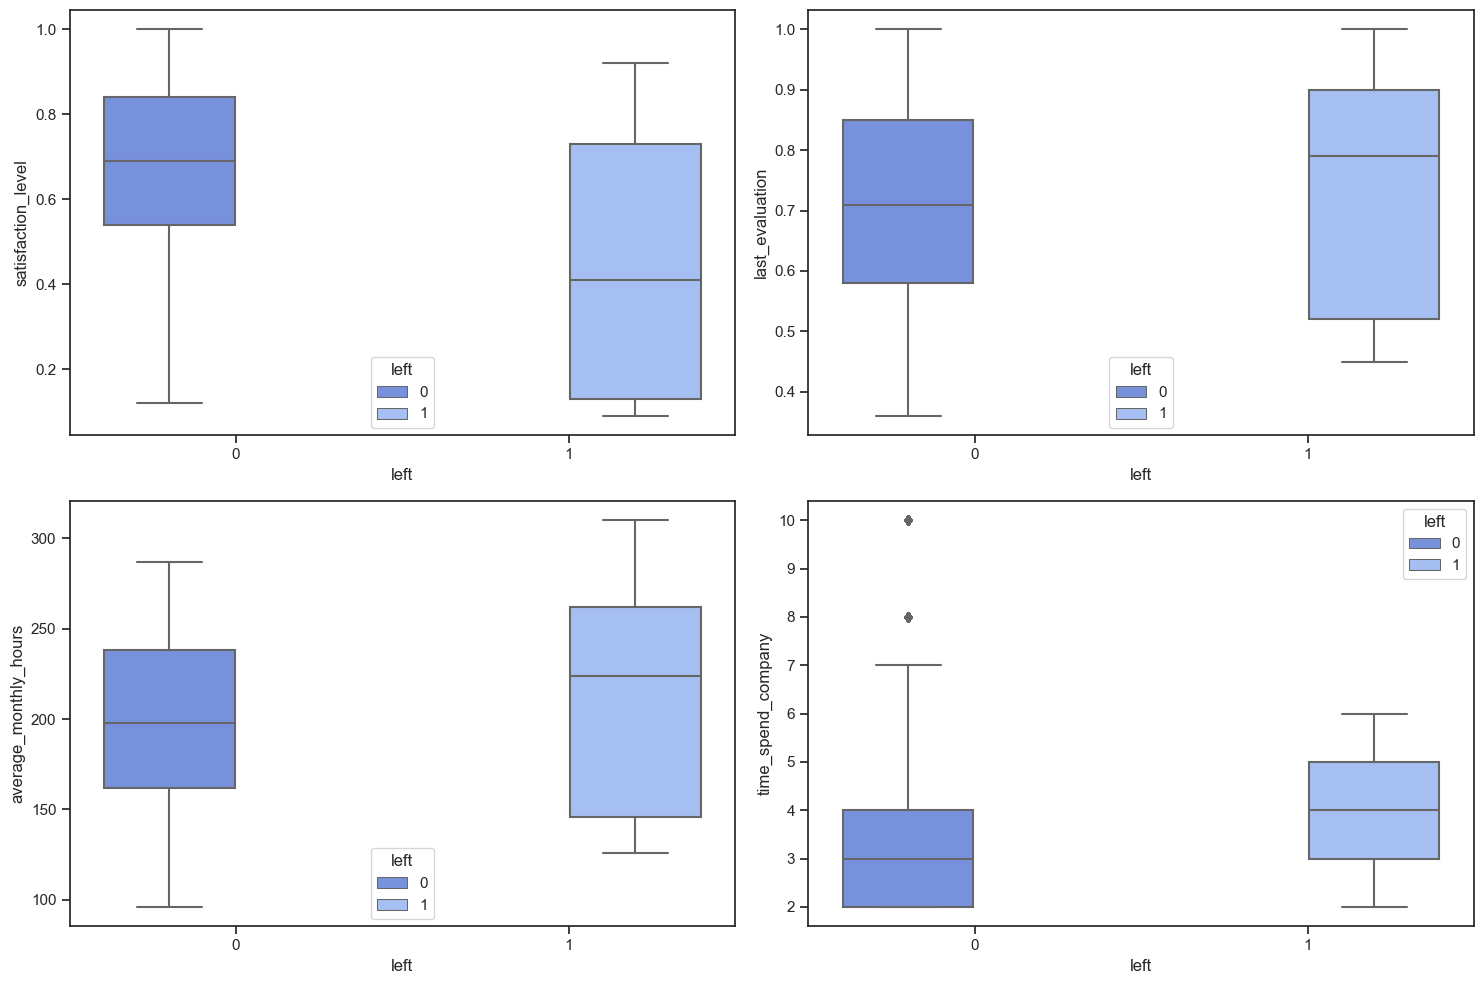

In [11]:
# boxplot visualization of selected variables 

sns.set_theme(style="ticks", palette="coolwarm")

#predictors
variables = df.columns.drop('left')

# intiate plot
plt.figure(figsize=(15, 10))

# Plot each variable against 'left'
plt.subplot(2, 2, 1)  
sns.boxplot(x="left", y="satisfaction_level", data=df, hue="left")

plt.subplot(2, 2, 2)  
sns.boxplot(x="left", y="last_evaluation", data=df, hue="left")

plt.subplot(2, 2, 3)  
sns.boxplot(x="left", y="average_monthly_hours", data=df, hue="left")

plt.subplot(2, 2, 4)  
sns.boxplot(x="left", y="time_spend_company", data=df, hue="left")

plt.tight_layout()

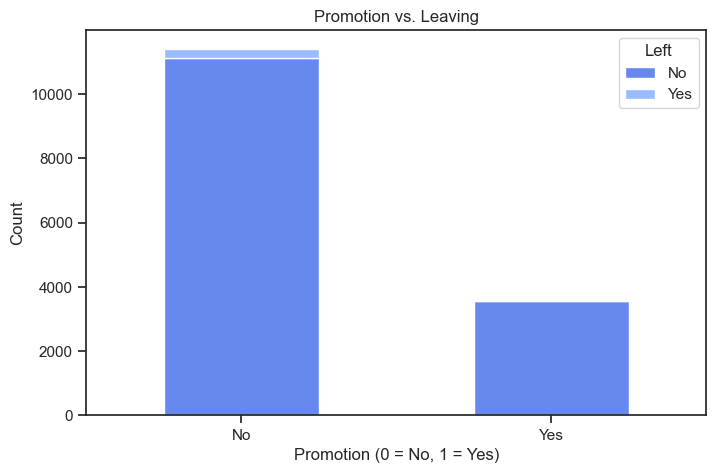

In [12]:
# promotion and leaving 
data_ct = pd.crosstab(df['left'], df['promotion_last_5years'])
# Plot
data_ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Promotion vs. Leaving')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()

<ins>Comments</ins>: 
- Employeess with high satisfaction levels had high attrition rate; which is surprising
- Median time of last evalutation for employees who left is marginally lower than those who stayed
- Employees who left had lower average monthly hours than those who stayed
- Longer the employee has been with the organization, higher the chances they won't leave
- Promoted people stay longer than people who are not

#### Question 4 
Demonstrate your exploratory data analysis (EDA) and statistical hypothesis testing skills
(e.g., correlation analysis, heatmap, hypothesis testing).
 
a) What X variables appear to influence “whether the employee left the workplace or not (1 
or 0)

b) What X variables are highly correlated to each other?

c) The dataset contains two groups of employees (those left from and those remaining with 
their organizations). Earlier, you developed three hypotheses. Perform hypothesis testing
here. Assume the data is normally distributed and perform t-testing.”? 

In [13]:
# Correlation Analysis 
# dummy variables have already been created 
df.corr().head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,0.01,-0.03,-0.01,0.01,0.01,0.01,0.00,0.01,-0.01,-0.05,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,-0.01,0.00,-0.01,0.01,-0.00,-0.00,-0.02,0.02,0.01,0.01,0.01


In [14]:
# sort the correlation values and make a data frame 
corr = pd.DataFrame(df.corr()['left'].drop('left'))
corr.sort_values(['left'], ascending = False)

,left
time_spend_company,0.14
salary_low,0.13
average_monthly_hours,0.07
sales_hr,0.03
number_project,0.02
sales_technical,0.02
sales_accounting,0.02
sales_support,0.01
sales_sales,0.01
last_evaluation,0.01


- Time spend in the company, and low salary levels are the top two variables that show positive correlation with attrition.
- Satifisfaction level, work accident are the top two variables that show negative correlation with employee attrition.

We will use p-values to see if these are just random associations or have statistical significance  

In [15]:
pg.corr(x=df['left'], y=df['time_spend_company'])

,n,r,CI95%,p-val,BF10,power
pearson,14999,0.14,"[0.13, 0.16]",0.00,1.068e+67,1.00


In [16]:
pg.corr(x=df['left'], y=df['salary_low'])

,n,r,CI95%,p-val,BF10,power
pearson,14999,0.13,"[0.12, 0.15]",0.00,4.483e+57,1.00


In [17]:
pg.corr(x=df['left'], y=df['satisfaction_level'])

,n,r,CI95%,p-val,BF10,power
pearson,14999,-0.39,"[-0.4, -0.37]",0.00,inf,1.00


In [18]:
pg.corr(x=df['left'], y=df['work_accident'])

,n,r,CI95%,p-val,BF10,power
pearson,14999,-0.15,"[-0.17, -0.14]",0.00,6.347e+76,1.00


All four variables (top two positively correlated and top two negatively correlated ) appear to be significant as their p-value < 0.05

In [19]:
# Check if the correlation is statistically significant with other variables  
pg.pairwise_corr(df, columns=['left']).round(2)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,left,satisfaction_level,pearson,two-sided,14999,-0.39,"[-0.4, -0.37]",0.00,inf,1.00
1,left,last_evaluation,pearson,two-sided,14999,0.01,"[-0.01, 0.02]",0.42,0.014,0.13
2,left,number_project,pearson,two-sided,14999,0.02,"[0.01, 0.04]",0.00,0.713,0.83
3,left,average_monthly_hours,pearson,two-sided,14999,0.07,"[0.06, 0.09]",0.00,3.975e+14,1.00
4,left,time_spend_company,pearson,two-sided,14999,0.14,"[0.13, 0.16]",0.00,1.068e+67,1.00
5,left,work_accident,pearson,two-sided,14999,-0.15,"[-0.17, -0.14]",0.00,6.347e+76,1.00
6,left,promotion_last_5years,pearson,two-sided,14999,-0.06,"[-0.08, -0.05]",0.00,2.917e+10,1.00
7,left,sales_RandD,pearson,two-sided,14999,-0.05,"[-0.06, -0.03]",0.00,1.223e+05,1.00
8,left,sales_accounting,pearson,two-sided,14999,0.02,"[-0.0, 0.03]",0.06,0.058,0.46
9,left,sales_hr,pearson,two-sided,14999,0.03,"[0.01, 0.04]",0.00,4.068,0.93


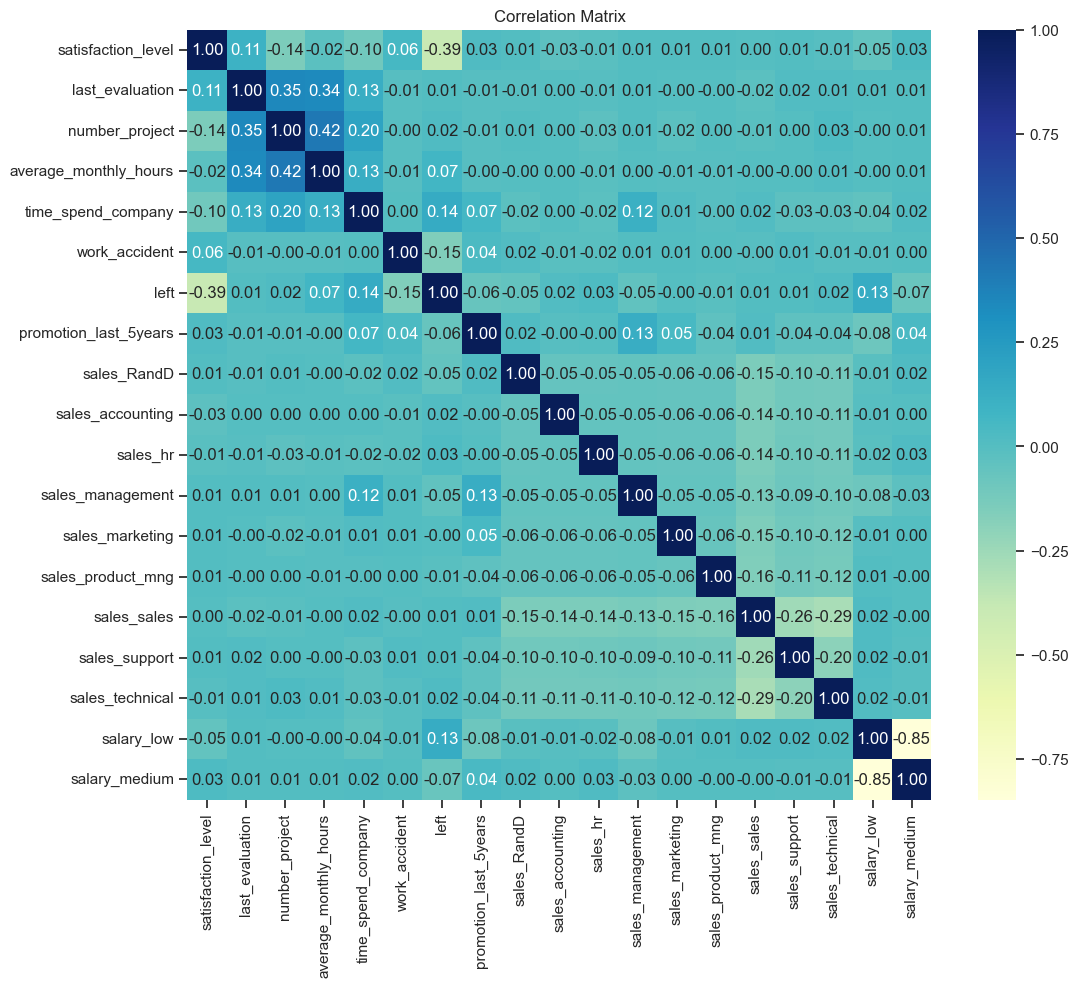

In [20]:
# Visualize correlation with heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'YlGnBu')
plt.title("Correlation Matrix")
plt.show()

<ins>Comments</ins>: 
- The following can be said bout highly correlated X variables
  - Average monthly hours and number of projects are highly correlated with a positive correlation coefficient of 0.42
  - Number of projects is also positively and moderately correlated with last_evaluation
  - Multicollinearity is observed within the two levels of salary: salary_medium and salary_low. Same can be said about the levels of Sales. 

#### Hypothesis Test with T-Tests 

#### Hypothesis 1: 
Null Hypothesis: There is no significant difference in satisfaction levels between employees who stayed in the company and those who left.

Alternative Hypothesis: There is a significant difference in satisfaction levels between employees who stayed at the company and those who left.

In [21]:
# comparing two groups
satisfaction_level_left = df[df['left'] == 0]['satisfaction_level']
satisfaction_level_stayed = df[df['left'] == 1]['satisfaction_level']

In [22]:
# Perform T-test
pg.ttest(satisfaction_level_left, satisfaction_level_stayed, correction=False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,51.61,14997,two-sided,0.00,"[0.22, 0.24]",0.99,inf,1.00


**Conclusion:** We have enough evidence to reject null hypothesis (p < 0.05). There is significant difference is satisfaction level between employees who left and who stayed 

#### Hypothesis 2: 

Null Hypothesis: Salary level does not influence whether employees leave or stay in the company.

Alternative Hypothesis: The difference in salary levels between employees who stayed at the company and those who left is significant.

In [23]:
# comparing two groups
salary_left = df[df['left'] == 0]['salary_low']
salary_stayed = df[df['left'] == 1]['salary_medium']

# Perform T-test
pg.ttest(salary_left, salary_stayed, correction=False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.59,14997,two-sided,0.00,"[0.06, 0.1]",0.17,1.919e+14,1.00


**Conclusion:** We have enough evidence to reject null hypothesis (p < 0.05). There difference in salary levels of the employees is significant. 

#### Hypothesis 3:

Null Hypothesis: Receiving a promotion in last five years does not influence employee turnover. 

Alternative Hypothesis: Promotion within the last five years is a significant factor in an employee turnover.

In [24]:
# comparing two groups
No_promotion_left = df[df['left'] == 0]['promotion_last_5years']
Promotion__stayed = df[df['left'] == 1]['promotion_last_5years']

# Perform T-test
pg.ttest(No_promotion_left, Promotion__stayed, correction=False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.58,14997,two-sided,0.00,"[0.02, 0.03]",0.14,5.948e+10,1.00


**Conclusion:** We have enough evidence to reject null hypothesis (p < 0.05). Whether an employee received a promotion in last five years or not significantly incluences employee turnover

#### Question 5 

Demonstrate your skills in building, validating, and evaluating classification models. You 
need to use the following machine learning algorithms and report the model performance
    
a) Decision tr
    e
b) 
    nn
c) Logistic regres
    ion
d) Random Forest Classifier

#### (a) Decision Trees 

In [25]:
# declare X variables and y variable

y = df['left']
X = df.drop('left', axis = 1)

In [26]:
# split validation
# Splitting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10499, 18), (4500, 18), (10499,), (4500,))

In [27]:
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.9764444444444444
--------------------------------------------------------
[[3386   76]
 [  30 1008]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3462
           1       0.93      0.97      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500

--------------------------------------------------------
0.9745728186787684


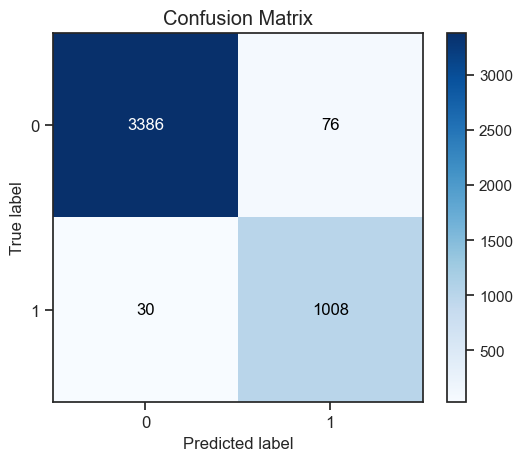

In [29]:
# Classification matrix 
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

The models preidction accuracy is 97.9 %. In total 93 observations have been misclassified. 29 employees who stayed were classified as left, and 64 employees who left were classified as stay.  

In [30]:
# Visualization of the decision tree 
text_representation = tree.export_text(dt, feature_names=(list(X.columns)))
print(text_representation)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- average_monthly_hours <= 162.00
|   |   |   |   |   |--- average_monthly_hours <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- average_monthly_hours >  125.50
|   |   |   |   |   |   |--- satisfaction_level <= 0.34
|   |   |   |   |   |   |   |--- average_monthly_hours <= 140.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- average_monthly_hours >  140.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- satisfaction_level >  0.34
|   |   |   |   |   |   |   |--- last_evaluation <= 0.56
|   |   |   |   |   |   |   |   |--- average_monthly_hours <= 150.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- average_monthly_hours >  150.50
|  

#### (b) KNN Classification

In [31]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

# initialize KNN algorithn 
knn = KNeighborsClassifier()

# train using fit function 
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [32]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
# evaluate the decision tree model using 10-fold cross-validation

# generate evaluation metrics
print(metrics.accuracy_score(y_test, knn.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9373333333333334
[[3264  198]
 [  84  954]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3462
           1       0.83      0.92      0.87      1038

    accuracy                           0.94      4500
   macro avg       0.90      0.93      0.91      4500
weighted avg       0.94      0.94      0.94      4500



In [33]:
# with 10-fold cross validation 
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.94 0.93 0.93 0.93 0.93 0.93 0.95 0.94 0.95 0.95]
0.9380634645319101


The model is 93.8 % accurate with 10 fold cross validation. 

#### (c) Logistic Regression

In [34]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [35]:
# print coefficients
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,X variables,coef
16,salary_low,1.89
17,salary_medium,1.36
1,last_evaluation,0.58
9,sales_hr,0.43
4,time_spend_company,0.28
14,sales_support,0.27
15,sales_technical,0.26
13,sales_sales,0.17
8,sales_accounting,0.17
11,sales_marketing,0.08


In [36]:
#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7928888888888889
[[3204  258]
 [ 674  364]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3462
           1       0.59      0.35      0.44      1038

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

0.6380754884576726


The model's prediction accuracy is 79.2 %. 

#### (d) Random Forest Classifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9897777777777778

In [38]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9897777777777778
[[3451   11]
 [  35 1003]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



The prediction accuracy of random forest classifier is 98.9 %

#### Question 6

#### Comparing Algorithms

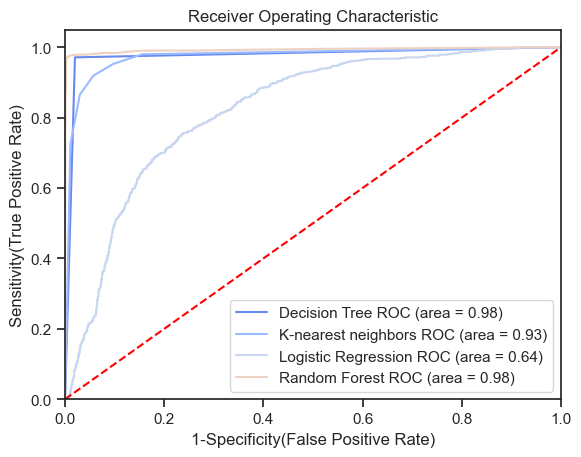

In [39]:
#https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

**Best Model & Model Performance:** 
- Ramdom forest classifier outperforms all other model as it has the highest prediction accuracy, i.e. 98.9 %. It also has the highest area under the ROC curve among all other modles. 

#### Question 7

#### Story Telling 

a) What are the results of testing your hypotheses?
- Employee attrition is significantly influenced by employee satisfication level
- The difference is salary levels between employees who choose to stay with the organization and those who decided to leave is statistically significant. This means employers should rationally consider salary levels if the wish to retain employees.
- Whether an employee has received a promotion within the last five years influences their decision to stay or leave the organization  

b) Discuss your classification model(s) for companies and HR managers. What variables are 
important in predicting employee turnover? And how important are they? What are the
characteristics of the employees who are likely to leave?

The classification models can be used by HR managers of different companies to make policy level changes based on what significantly influences attrition rate. While all models have performed good, best results were obtained from Random Forest Classifier. 
HR managers can decide on which model to use based on the following ranking based on prediction accuracies: 
- Random Forest Classifier (98.9)
- Decision Tree Classifier (97.6)
- KNN Classifier (93.7)
- Logistic Regression (79.2)

In [40]:
# another method
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
satisfaction_level,0.36
time_spend_company,0.19
number_project,0.15
last_evaluation,0.14
average_monthly_hours,0.13
salary_low,0.01
work_accident,0.01
salary_medium,0.00
sales_sales,0.00
sales_technical,0.00


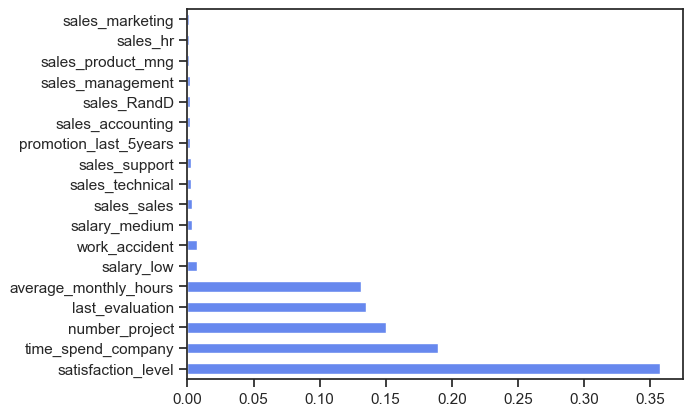

In [41]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

<ins>Most Important Variables</ins>: 

- Satisfaction_level, time_spend_company, number_project, last_evaluation, average_monthly_hours are the top five important variables in predicting employee turnover. The plot above quantifies the importance level. 

Employees who are likely to leave have lower satisfaction level, lower salary and are involved in work accidnent among others. 